# Описание проекта

Аналитиками и отделом маркетинга крупного интернет-магазина был подготовлен список гипотез для увеличения выручки.
Приоритизирем гипотезы, запустим A/B-тест и проанализируем результаты.

## Приоритизация гипотез

Импортируем нужные библиотеки, загрузим данные.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from pylab import rcParams

import math
from scipy import stats

from datetime import timedelta
import datetime as dt

from statsmodels.stats.proportion import proportions_ztest
import warnings
from pandas.plotting import register_matplotlib_converters

warnings.filterwarnings('ignore')

In [2]:
try:
    data = pd.read_csv('/datasets/hypothesis.csv', sep=',')
    pd.set_option('display.max_columns', None)
    pd.options.display.max_colwidth = 120
    display(data.head(9))
except:
    data = pd.read_csv('hypothesis.csv', sep=',')
    pd.set_option('display.max_columns', None)
    pd.options.display.max_colwidth = 120
    display(data.head(9))

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


**Описание данных** 

* Hypothesis — краткое описание гипотезы;
* Reach — охват пользователей по 10-балльной шкале;
* Impact — влияние на пользователей по 10-балльной шкале;
* Confidence — уверенность в гипотезе по 10-балльной шкале;
* Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Столбцы датасета приведем к нижнему регистру.


In [3]:
data.columns = [x.lower() for x in data.columns.values]

### Задача 1

Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [4]:
data['ICE'] = ((data['impact'] * data['confidence']) / data['efforts']).astype('int')

data[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1


Наиболее перспективные гипотезы по ICE:
* _"Запустить акцию, дающую скидку на товар в день рождения"_ ;
* _"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей"_;
* _"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"_.

###  Задача 2


Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [5]:
data['RICE'] = (data['reach'] * data['impact'] * data['confidence'] / data['efforts']).astype('int')

data[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40
8,"Запустить акцию, дающую скидку на товар в день рождения",16
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3


По RICE наиболее перспективными гипотезами являются:
* _"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"_;
* _"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа"_;
* _"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей"_.

### Задача 3

Посмотрим как изменилась приоритизация гипотез при применении RICE вместо ICE. 

In [6]:
data[['hypothesis', 'ICE', 'RICE']].style.background_gradient(cmap=sns.light_palette("green", as_cmap=True))

,hypothesis,ICE,RICE
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13,40
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,4
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7,56
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1,9
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1,3
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1,4
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8,40
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11,112
8,"Запустить акцию, дающую скидку на товар в день рождения",16,16


### Вывод:


Наиболее перспективная гипотеза по ICE _"Запустить акцию, дающую скидку на товар в день рождения"_ не попала в топ-3 перспективных гипотез по RICE. Это объясняется тем, что фреймворк ICE  не учитывает компонент "Reach", выполнение этой гипотезы затронет меньше всего пользователей.

Гипотезы _"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"_ и _"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей"_ обе попали в топ-3 по фрейморкам ICE и RICE, **будем их считать наиболее перспективными**. 

Перспективная гипотеза по RICE _"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа"_ не является особо перспективной по ICE, потому что в данном фрейворке не учитывается компонент Reach, который отвечает за количество пользователей, на которых повлияет данное изменение. 


## Анализ A/B-теста

### Предобработка данных

Был проведен A/B-тест и получены результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.

Загрузим данные.


In [7]:
try:
    orders = pd.read_csv('/datasets/orders.csv', sep=',')
    display(orders.head())
except:
    orders = pd.read_csv('orders.csv', sep=',')
    display(orders.head())

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


**Описание:**
* transactionId — идентификатор заказа;
* visitorId — идентификатор пользователя, совершившего заказ;
* date — дата, когда был совершён заказ;
* revenue — выручка заказа;
* group — группа A/B-теста, в которую попал заказ.

In [8]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


Количество значений в каждом столбце одинаково, пропуски отсутствуют.


Изменим названия первых двух столбцов и переведем дату в нужный тип данных.


In [9]:
orders = orders.rename(columns={"transactionId": "orderId", "visitorId": "userId"})

In [10]:
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [11]:
orders.describe().style.format('{:.0f}', na_rep='-')

,orderId,userId,revenue
count,1197,1197,1197
mean,2155621386,2165960143,8348
std,1229084905,1236014192,39191
min,1062393,5114589,50
25%,1166775572,1111826046,1220
50%,2145193898,2217984702,2978
75%,3237740112,3177606451,8290
max,4293855558,4283872382,1294500


Медианная выручка заказа и средняя значительно отличаются друг от друга (2978 и 8348 соответственно), это свидетельствует о выбросах.

In [12]:
#проверим на дубликаты
orders[orders.duplicated()]

,orderId,userId,date,revenue,group


Дубликаты отсутствуют.

In [13]:
orders['group'].value_counts()

B    640
A    557
Name: group, dtype: int64

В группе В количество людей значительно больше, как это исправить пока непонятно.

Посмотрим есть ли пользователи которые попали в обе группы.

In [14]:
usersAB = orders.pivot_table(index='userId', values='group', aggfunc='nunique')
usersAB.query('group> 1').count()

group    58
dtype: int64

В обе группы попали 58 пользователей - это небольшое количество. Не буду их удалять, они не должны значительно влиять на результат. К тому же если все данные записаны корректно и в них нет ошибок, то возможно в какой-то группе пользователь повел себя по-другому т.к на него повляли изменения. Если я ошибаюсь, поправьте пожалуйста.

In [15]:
try:
    visitors = pd.read_csv('/datasets/visitors.csv', sep=',')
    display(visitors.head())
except:
    visitors = pd.read_csv('visitors.csv', sep=',')
    display(visitors.head())

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [16]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Изменим тип данных для даты.

In [17]:
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

Проверим на дубликаты.

In [18]:
visitors[visitors.duplicated()]

,date,group,visitors


Дубликаты отсутствуют.

*Вывод:* Данные готовы для дальнейшего анализа.

### Задача 1

Построим график кумулятивной выручки по группам. 

In [19]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

In [20]:
#получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'orderId': 'nunique',
            'userId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

In [21]:
# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

In [22]:
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

In [23]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

In [24]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

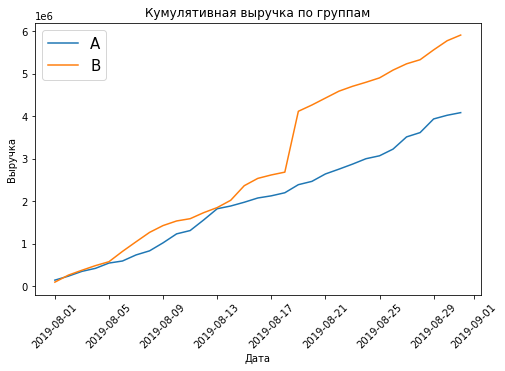

In [25]:
plt.figure(figsize=(8,5))
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
 
plt.xticks(rotation=45)
plt.legend(loc=2, prop={'size': 15})
plt.title('Кумулятивная выручка по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка')

plt.show()

Выручка увеличивается в течение всего теста для обоих групп. С самого начала сегмент B пошел вверх и лидировал весь тест. В середине августа видим довольно резкий скачок сегмента B. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке.

### Задача 2

Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов.

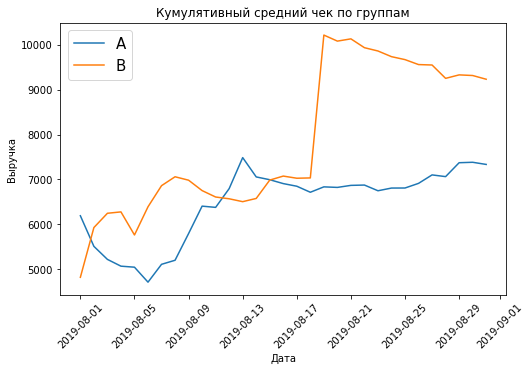

In [26]:
plt.figure(figsize=(8,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xticks(rotation=45)
plt.legend(loc=2, prop={'size': 15})
plt.title('Кумулятивный средний чек по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка')

plt.show()

Кумулятивное значение среднего чека нестабильно. После 17 августа средний чек сегмента В резко увеличился(с 7000 до 10000) и после стабильно уменьшался. Можно предположить что в группе В 17 августа был оформлен заказ на очень большую сумму.

Пик для семента А пришелся на 13 августа (7500), после чего выручка пошла на спад и под конец заметен небольшой рост.

### Задача 3

Построим график относительного изменения кумулятивного среднего чека группы B к группе A.

In [27]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(
    cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B']
)

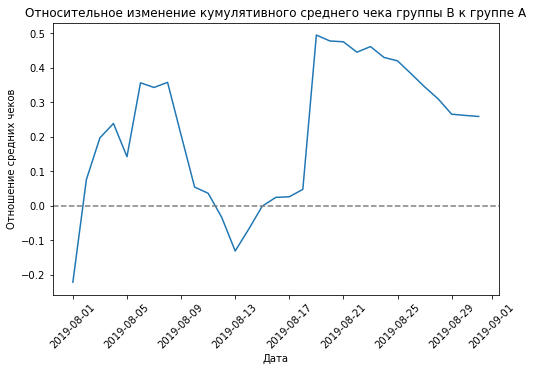

In [28]:
fig = plt.figure(figsize=(8, 5))
# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='grey', linestyle='--')

plt.xticks(rotation=45)
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Отношение средних чеков')

plt.show()

Результаты теста значительно и резко менялись в несколько дат. Вероятно, в эти дни были соверешены большие заказы.

### Задача 4

Построим график кумулятивной конверсии по группам.

In [29]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

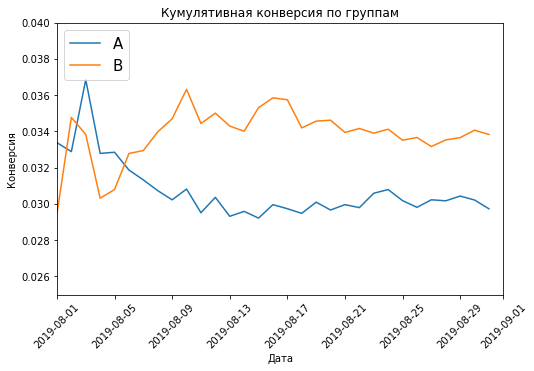

In [30]:
#Зададим размер графиков по умолчанию
rcParams['figure.figsize'] = 8, 5

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.xticks(rotation=45)
plt.legend(loc=2, prop={'size': 15})
plt.title("Кумулятивная конверсия по группам")
plt.xlabel('Дата')
plt.ylabel('Конверсия')

# задаем масштаб осей
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), 0.025, 0.04])

plt.show()

Конверсия группы А падает на протяжении всего наблюдения после скачка произошедшего 3 августа, если не учитывать этот скачок, то конверсия относительно стабильна. 


Конверсия группы В тоже относительна стабильна, но примерно 2 августа заметен спад на несколько дней и снова скачок. Несмотря на то что конверсия группы А изначально выше, к концу эксперимента конверсия группы В стабильно лучше.

### Задача 5

Построим график относительного изменения кумулятивной конверсии группы B к группе A.

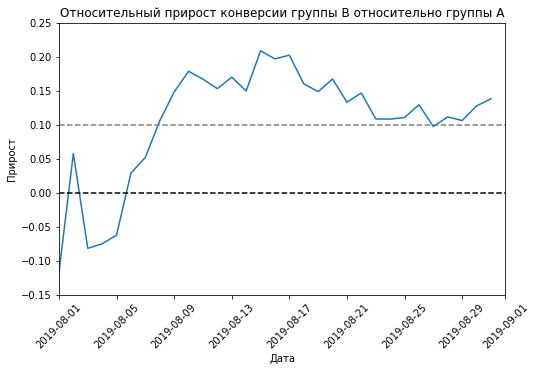

In [31]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)
plt.xlabel('Дата')
plt.ylabel('Прирост')
plt.xticks(rotation=45)
plt.title("Относительный прирост конверсии группы B относительно группы A")
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), -0.15, 0.25])
plt.show()

В начале эксперимента мы видим что группа В уступала в конверсии группе А. Затем в области 5 августа видим большой скачок до 15-20%. К концу эксперимента конверсия группы В пошла немного на спад, но все равно оставалась положительной и более-менее стабилизировалась в районе 12%.

### Задача 6

Построим точечный график количества заказов по пользователям.

Найдем число заказов по пользователям — создадим датафрейм c двумя столбцами: 'userId' и 'orders'. Назовем его ordersByUsers.

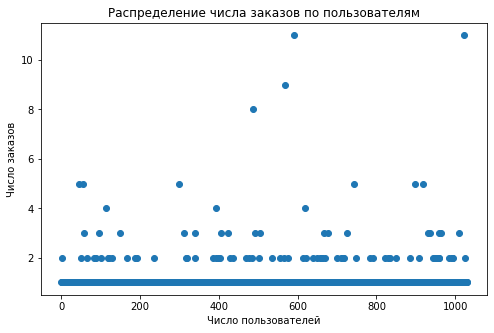

In [32]:
ordersByUsers = (
    orders.groupby('userId', as_index=False)
    .agg({'orderId': 'nunique'})
)
ordersByUsers.columns = ['userId', 'orders']

# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders']) 
plt.title('Распределение числа заказов по пользователям')
plt.xlabel('Число пользователей')
plt.ylabel('Число заказов')
plt.show()

Большинство пользователей оформляли заказы 1-2 раза. 

### Задача 7

Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.


In [33]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([2., 4.])

Не более 5% пользователей совершали больше двух заказов. И не более 1% пользователей - больше четырех заказов.

Границу для аномальных пользователей возьмем в 2 заказа.

### Задача 8

Построим точечный график стоимостей заказов. 

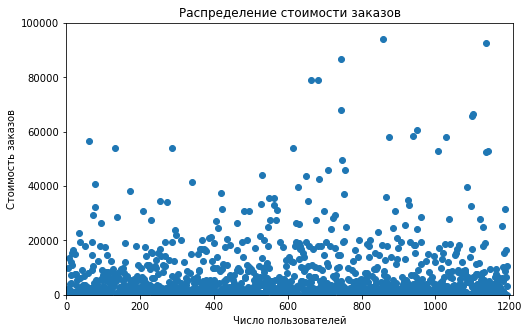

In [34]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('Распределение стоимости заказов')
plt.xlabel('Число пользователей')
plt.ylabel('Стоимость заказов')
plt.axis([0, 1210, 0, 100000])

plt.show()

В данном случае сложно определить где пройдет граница между большинством и выбросами.

### Задача 9

Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.

In [35]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

По подсчетам не более 5% пользователей оформляли заказы на сумму более чем 28000, возьмем это число за границу.

### Задача 10

Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным — без удаления аномальных пользователей.
Сформулируем гипотезы. 

*Нулевая:* различий в конверсии между группами нет. 

*Альтернативная:* различия в конверсии между группами есть.

In [36]:
# получаем агрегированные кумулятивные по дням данные о посетителях группы А
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

# получаем агрегированные кумулятивные по дням данные о посетителях группы В
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']



In [37]:
# получаем агрегированные по дням данные о заказах и выручке группы А
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'orderId', 'userId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'orderId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

# получаем кумулятивные по дням данные о заказах и выручке группы А
ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

In [38]:
# получаем агрегированные по дням данные о заказах и выручке группы В
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'orderId', 'userId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'orderId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

# получаем кумулятивные по дням данные о заказах и выручке группы В
ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

In [39]:
# Объединяем по дате все полученные кумулятивные данные в один датафрейм
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)
data.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


Названия столбцов в полученной таблице:
* date — дата;
* ordersPerDateA — количество заказов в выбранную дату в группе A;
* revenuePerDateA — суммарная выручка в выбранную дату в группе A;
* ordersPerDateB — количество заказов в выбранную дату в группе B;
* revenuePerDateB — суммарная выручка в выбранную дату в группе B;
* ordersCummulativeA — суммарное число заказов до выбранной даты включительно в группе A;
* revenueCummulativeA — суммарная выручка до выбранной даты включительно в группе A;
* ordersCummulativeB — суммарное количество заказов до выбранной даты включительно в группе B;
* revenueCummulativeB — суммарная выручка до выбранной даты включительно в группе B;
* visitorsPerDateA — количество пользователей в выбранную дату в группе A;
* visitorsPerDateB — количество пользователей в выбранную дату в группе B;
* visitorsCummulativeA — количество пользователей до выбранной даты включительно в группе A;
* visitorsCummulativeB — количество пользователей до выбранной даты включительно в группе B.

In [40]:
#Посчитаем статистическую значимость различия в конверсии между группами.
# Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['userId', 'orders']. 
# В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('userId', as_index=False)
    .agg({'orderId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('userId', as_index=False)
    .agg({'orderId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

In [41]:
#Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов.

pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')
[ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')]

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)


sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

#Выведем относительный прирост конверсии группы B: конверсия группы B / конверсия группы A - 1.
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('userId', as_index=False)
    .agg({'orderId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('userId', as_index=False)
    .agg({'orderId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print("P-value по конверсии до очистки данных: {0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("Относительный прирост конверсии группы B: {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

P-value по конверсии до очистки данных: 0.01679
Относительный прирост конверсии группы B: 0.138


P-value меньше 0.05, нулевую гипотезу отвергаем. Относительный прирост конверсии группы В больше группы А на 13.8%.

### Задача 11

Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.

*Нулевая гипотеза:* различий в среднем чеке между группами нет. 

*Альтернативная гипотеза:* различия в среднем чеке между группами есть.

In [42]:
print('P-value по среднему чеку до очистки данных: {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительный прирост среднего чека группы B к среднему чеку группы А до очистки данных:{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

P-value по среднему чеку до очистки данных: 0.729
Относительный прирост среднего чека группы B к среднему чеку группы А до очистки данных:0.259


P-value значительно больше 0.05, следовательно отвергнуть нулевую гипотезу мы не можем. 

Но относительный прирост среднего чека группы B к среднему чеку группы А равен 26%. Довольно большой процент, посмотрим на результат после очистки данных.

### Задача 12

Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным. 

Сделаем срезы пользователей с числом заказов больше 2 — usersWithManyOrders и пользователей, совершивших заказы дороже 28 000 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers.
Узнаем, сколько всего аномальных пользователей методом shape().

In [43]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['userId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.shape)

(74,)


In [44]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('P-value по конверсии после очистки данных:{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительный прирост конверсии группы B после очистки данных: {0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

P-value по конверсии после очистки данных:0.013
Относительный прирост конверсии группы B после очистки данных: 0.173


P-value по конверсии до очистки данных: 0.01679;

Относительный прирост конверсии группы B до очистки данных: 0.138

P-value практически не изменилось и стало даже несколько меньше после очистки, следовательно различие в конверсиях групп значительно.  Сегмент B лучше сегмента А.

Относительный прирост конверсии группы В по отношению к группе А после очистки составляет 17%, вместо 14%. 

### Задача 13

Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.

In [45]:
print(
    'P-value по среднему чеку после очистки данных: {0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['userId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['userId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "Относительный прирост среднего чека группы B к среднему чеку группы А после очистки данных: {0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['userId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['userId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

P-value по среднему чеку после очистки данных: 0.738
Относительный прирост среднего чека группы B к среднему чеку группы А после очистки данных: -0.020


P-value по среднему чеку до очистки данных: 0.729

Относительный прирост среднего чека группы B к среднему чеку группы А до очистки данных:0.259

Относительный прирост по среднему чеку до и после очистки очень сильно отличаются, на 28%. Это означает, что мы упешно убрали выбросы, которые искажали нам результат. Теперь значение относительного прироста имеет отрицательный знак - минус 2%, что может быть погрешностью и означать скорее то, что различий в средних чеках между группами практически нет или она статистически не значима.

### Задача 14: Вывод

Примите решение по результатам теста и объясните его. 
Варианты решений: 
1. Остановить тест, зафиксировать победу одной из групп. 
2. Остановить тест, зафиксировать отсутствие различий между группами. 
3. Продолжить тест.

Опираясь на полученные результаты и несмотря на то, что по среднему чеку статистической значимости не обнаружено, нужно остановить тест и зафиксировать победу группы В. 

B группа статистически значимо лучше группы A по метрике конверсии. Одна из наиболее перспективных гипотез заключалась в том, чтобы привлечь больше клиентов, она звучала так: "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей". Следовательно, в данном случае мы должны оценить динамику конверсии групп. 

Коверсия влияет на выручку, и поэтому раз конверсия в случае группы В значимо увеличилась, то и выручка увеличилась тоже. И это не противоречит тому, что средний чек остался без изменений.